# Table of Contents
- [Data](#Data)
    - Loading the dataset
    - Pre-processing the data
    - Visualizing the First 21 Training Images
    
    
- [Implementation](#Implementation)
    - Without transfer learning
    - With transfert learning

In [1]:
from tools import *

/home/selimsepthuit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow.python.training'

In [2]:
import tensorflow as tf
from keras.backend import set_session

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow.python.training'

In [3]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 4} ) 
sess = tf.Session(config=config) 
set_session(sess)

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

ModuleNotFoundError: No module named 'tensorflow.python.client'

# Data
---

## Loading the dataset

The data used to train the classifier comes from the [INRIA person dataset](http://pascal.inrialpes.fr/data/human/), or VOC2012

Direct link: [download](ftp://ftp.inrialpes.fr/pub/lear/douze/data/INRIAPerson.tar)  (970MBB tar file)

In [2]:
# load train and test datasets
train_files, train_targets, classes = load_dataset('INRIAPerson/Train/')
test_files,  test_targets,  classes = load_dataset('INRIAPerson/Test/')

In [3]:
# Statistics about the dataset
print('Classes:', classes)
print('Total images \t\t: ', len(np.hstack([train_files, test_files])))
print('Training images \t: ', len(train_files))
print('Test images \t\t: ', len(test_files))

Classes: ['huma', 'non_huma']
Total images 		:  2573
Training images 	:  1820
Test images 		:  753


## Visualising the data

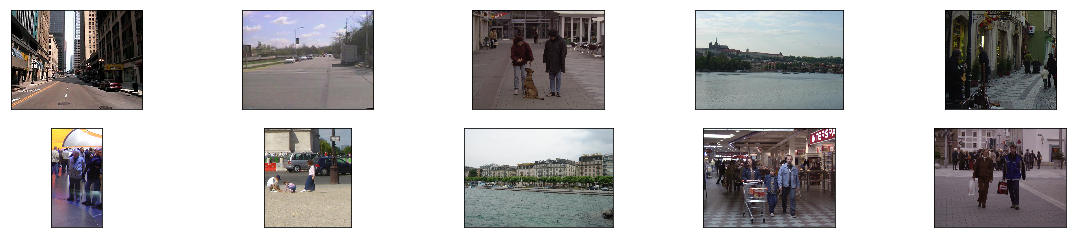

In [4]:
display_examples(train_files, number=10)

## Pre-processing the data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape:

$$
(\text{nb_samples}, \ \text{rows}, \ \text{columns}, \ \text{channels})
$$

- `nb_samples` = total number of images (or samples)
- `rows`, `columns`, `channels` = number of rows, columns, channels for each image, respectively 

In [5]:
train_tensors = paths_to_tensor(train_files)
test_tensors = paths_to_tensor(test_files)

100%|██████████| 753/753 [00:10<00:00, 74.35it/s]


# Implementation
---

## Without transfer learning

### Model

The architecture used here (recomanded by Keras for [classification with little data](https://blog.keras.io/index.html)) consists in a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers. With the exception of ReLU, this is similar to the architectures that Yann LeCun advocated in the 1990s for image classification.

- We use `ReLU` activation functions to solve the vanishing gradient problem.
- We use `MaxPooling` to reduce the dimentionality after each convolution layer.
- We finish with two dense layers. The last layer has 133 nodes since there are 133 possible categories.
- Since we are constructing a multi-class classification we use `softmax` as the activation function of the last dense layer. 
- We use [L2 regularization](https://keras.io/regularizers/) and [Batch Normalization](https://keras.io/layers/normalization/) to tackle overfitting.

In [6]:
import model_from_scratch_3

model_name = 'model_from_scratch_3'
model = model_from_scratch_3.get_model(nb_classes=len(classes), summary=False)

In [9]:
# import model_from_scratch

# model_name = 'model_from_scratch'
# model = model_from_scratch.get_model(nb_classes=len(classes), summary=True)

### Training

In [ ]:
# from keras.callbacks import ModelCheckpoint  

# epochs = 40
# batch_size = 35

# checkpointer = ModelCheckpoint(filepath='saved_models/' + model_name +'.hdf5', 
#                                verbose=1, 
#                                save_best_only=True,
#                                save_weights_only=False)

# history = model.fit(train_tensors, train_targets, 
#                     validation_split=0.2,
#                     epochs=epochs, 
#                     batch_size=batch_size,
#                     callbacks=[checkpointer], 
#                     verbose=1)

Train on 1456 samples, validate on 364 samples
Epoch 1/40
1456/1456 [==============================] - 1550s 1s/step - loss: 0.6802 - acc: 0.6580 - val_loss: 0.6613 - val_acc: 0.6731

Epoch 00001: val_loss improved from inf to 0.66132, saving model to saved_models/model_from_scratch_3.hdf5
Epoch 2/40
1456/1456 [==============================] - 1544s 1s/step - loss: 0.6543 - acc: 0.6683 - val_loss: 0.6454 - val_acc: 0.6731

Epoch 00002: val_loss improved from 0.66132 to 0.64538, saving model to saved_models/model_from_scratch_3.hdf5
Epoch 3/40
1456/1456 [==============================] - 1546s 1s/step - loss: 0.6454 - acc: 0.6683 - val_loss: 0.6401 - val_acc: 0.6731

Epoch 00003: val_loss improved from 0.64538 to 0.64010, saving model to saved_models/model_from_scratch_3.hdf5
Epoch 4/40
1456/1456 [==============================] - 1543s 1s/step - loss: 0.6424 - acc: 0.6683 - val_loss: 0.6381 - val_acc: 0.6731

Epoch 00004: val_loss improved from 0.64010 to 0.63807, saving model to save

In [ ]:
learning_curves(history, 'saved_models/' + model_name + '.png')

In [ ]:
# Loading the model with the best validation loss
model.load_weights('saved_models/' + model_name + '.hdf5')

### Testing 

In [ ]:
compute_accuracy(model, test_tensors, test_targets)

In [ ]:
quick_test(model, test_files, 3, "final_conv_layer", "dense_layer")